#**Playing BlackJack using Monte Carlo**

##**BlackJack**

The object of the popular casino card game of blackjack is to
obtain cards **the sum of whose numerical values is as great as possible without exceeding 21.** All face cards count as 10, and an ace can count either as 1 or as 11.

We consider the version in which a player competes against the dealer. The game
begins with two cards dealt to both dealer and player. One of the dealer’s cards is face up and the other is face down.

If the player has 21 immediately (an ace and a 10-card),
it is called a natural. He then wins unless the dealer also has a natural, in which case the
game is a draw.

If the player does not have a natural, then he can request additional
cards, one by one (hits), until he either stops (sticks) or exceeds 21 (goes bust). If he goes
bust, he loses; if he sticks, then it becomes the dealer’s turn. The dealer hits or sticks
according to a fixed strategy without choice: he sticks on any sum of 17 or greater, and
hits otherwise. If the dealer goes bust, then the player wins; otherwise, the outcome—win,
lose, or draw—is determined by whose final sum is closer to 21.

##**Monte Carlo Methods**

Monte Carlo methods are ways of solving the reinforcement learning problem based on
averaging sample returns. To ensure that well-defined returns are available, here we define
Monte Carlo methods only for episodic tasks.



In [ ]:
!pip install gym pyvirtualdisplay > /dev/null 2>&1
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1
!apt-get update > /dev/null 2>&1
!apt-get install cmake > /dev/null 2>&1
!pip install gymnasium
! pip install pygame

In [ ]:
# Imports
import gymnasium as gym  # gymnasium which provides learning environment
import numpy as np       # You know it
from random import choices
import glob
import io
import base64
from IPython.display import HTML    # For rendering the game recording
from pyvirtualdisplay import Display
from IPython import display as ipythondisplay
from gymnasium.wrappers import RecordVideo

In [ ]:
def argmax(list1): # utility function to find the
    return list1.index(max(list1))

###**Creating and Visualizing the environment**

It is very important to see what are the actions and states provided by environment, to understand the game mechanics.

The environments are provided by [Gymnasium](https://gymnasium.farama.org/)(a fork of origin OpenAI Gym).

Documentation of [BlackJack](https://gymnasium.farama.org/main/environments/toy_text/blackjack/) environment

In [ ]:
env = gym.make('Blackjack-v1', render_mode="rgb_array") # this is the blackJack Environment

In [ ]:
# visualize the action space and observation space of env

print("Action space:", env.action_space)
print("Observation space:", env.observation_space[:])

Action space: Discrete(2)
Observation space: (Discrete(32), Discrete(11), Discrete(2))


In [ ]:
# env.action_space provides the info on actions
num_actions = env.action_space.n
action_space = np.array(range(num_actions))

action_space

array([0, 1])

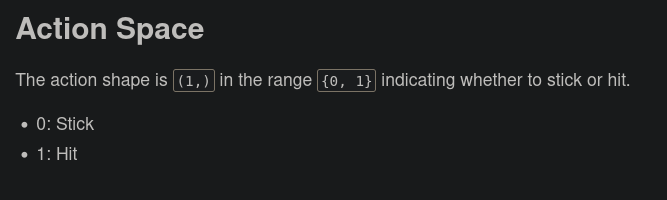

In [ ]:
# env.observation_space provides the info on states
observation_space = tuple(map(lambda x : x.n ,env.observation_space))
print(observation_space)
states = observation_space + (num_actions,) #useful for having probabilistic decisions for each state(choice between actions)
print(states)

(32, 11, 2)
(32, 11, 2, 2)


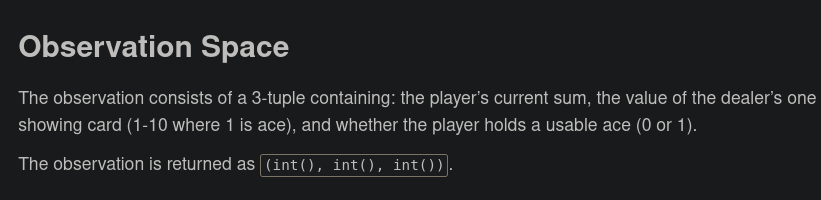

In [ ]:
# epsilon for small probability to one of the actions
# for exploratory learning
epsilon = 0.1

# Policy
pi = np.full(states, epsilon / 2)

# discount factor
gamma = 0.9

# Q function
Q = np.zeros(states)

# Counts of visits ( for finding average)
count = np.zeros(states)

In [ ]:
# number of episodes to train upon
episodes = 100000

# Recording the video
env = RecordVideo(env, './video',  episode_trigger = lambda episode_number: ((episode_number%10000 == 0) or episode_number < 100 or episode_number == 1000))


/usr/local/lib/python3.10/dist-packages/gymnasium/wrappers/record_video.py:94: UserWarning: WARN: Overwriting existing videos at /content/video folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


In [ ]:

def show_video(number: int):

        mp4 = f'./video/rl-video-episode-{number}.mp4'
        video = io.open(mp4, 'r+b').read()
        encoded = base64.b64encode(video)
        ipythondisplay.display(HTML(data='''<video alt="test" autoplay
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))

In [ ]:

for i in range(episodes):
  observation  = env.reset()[0] #  observation in beginning
  episode = []

  while True:
     (sum,deal,ace) = observation
     [action] = choices(action_space, weights = pi[sum][deal][ace], k = 1)

     observation, reward, terminated, truncated, info  = env.step(action) # take the action
     episode.append([observation ,action, reward]) # store the episode information to use later

     if terminated or truncated:
      break

  G = 0
  episode_length = len(episode)

  for x in range(episode_length - 1, -1, -1):

    [(sum,deal,ace),action, reward] = episode[x]   # [state, action, reward]

    G = G*gamma + reward                 # Returns we have got
    num = count[sum][deal][ace][action]  # Number of times, this (state,action) pair has been achieved
    val = Q[sum][deal][ace][action]      # Q value

    # update
    Q[sum][deal][ace][action] = (val* num + G)/(num+1)  # Finding average uisng
    count[sum][deal][ace][action]+=1


    # policy update
    a = np.argmax(Q[sum][deal][ace])   # select the action which has highest Q-value at this state

    for action in [0,1]: # also change the probabilites
      if action == a:
        pi[sum][deal][ace][action] = 1 - epsilon + epsilon/num_actions
      else:
        pi[sum][deal][ace][action] = epsilon/num_actions



Moviepy - Building video /content/video/rl-video-episode-0.mp4.
Moviepy - Writing video /content/video/rl-video-episode-0.mp4



/usr/local/lib/python3.10/dist-packages/gymnasium/wrappers/monitoring/video_recorder.py:178: UserWarning: WARN: Unable to save last video! Did you call close()?
  logger.warn("Unable to save last video! Did you call close()?")


Moviepy - Done !
Moviepy - video ready /content/video/rl-video-episode-0.mp4
Moviepy - Building video /content/video/rl-video-episode-1.mp4.
Moviepy - Writing video /content/video/rl-video-episode-1.mp4



Moviepy - Done !
Moviepy - video ready /content/video/rl-video-episode-1.mp4
Moviepy - Building video /content/video/rl-video-episode-2.mp4.
Moviepy - Writing video /content/video/rl-video-episode-2.mp4



Moviepy - Done !
Moviepy - video ready /content/video/rl-video-episode-2.mp4
Moviepy - Building video /content/video/rl-video-episode-3.mp4.
Moviepy - Writing video /content/video/rl-video-episode-3.mp4



Moviepy - Done !
Moviepy - video ready /content/video/rl-video-episode-3.mp4
Moviepy - Building video /content/video/rl-video-episode-4.mp4.
Moviepy - Writing video /content/video/rl-video-episode-4.mp4



Moviepy - Done !
Moviepy - video ready /content/video/rl-video-episode-4.mp4


Moviepy - Building video /content/video/rl-video-episode-5.mp4.
Moviepy - Writing video /content/video/rl-video-episode-5.mp4



Moviepy - Done !
Moviepy - video ready /content/video/rl-video-episode-5.mp4
Moviepy - Building video /content/video/rl-video-episode-6.mp4.
Moviepy - Writing video /content/video/rl-video-episode-6.mp4



Moviepy - Done !
Moviepy - video ready /content/video/rl-video-episode-6.mp4
Moviepy - Building video /content/video/rl-video-episode-7.mp4.
Moviepy - Writing video /content/video/rl-video-episode-7.mp4



Moviepy - Done !
Moviepy - video ready /content/video/rl-video-episode-7.mp4
Moviepy - Building video /content/video/rl-video-episode-8.mp4.
Moviepy - Writing video /content/video/rl-video-episode-8.mp4



Moviepy - Done !
Moviepy - video ready /content/video/rl-video-episode-8.mp4
Moviepy - Building video /content/video/rl-video-episode-9.mp4.
Moviepy - Writing video /content/video/rl-video-episode-9.mp4



Moviepy - Done !
Moviepy - video ready /content/video/rl-video-episode-9.mp4
Moviepy - Building video /content/video/rl-video-episode-10.mp4.
Moviepy - Writing video /content/video/rl-video-episode-10.mp4



Moviepy - Done !
Moviepy - video ready /content/video/rl-video-episode-10.mp4
Moviepy - Building video /content/video/rl-video-episode-11.mp4.
Moviepy - Writing video /content/video/rl-video-episode-11.mp4



Moviepy - Done !
Moviepy - video ready /content/video/rl-video-episode-11.mp4
Moviepy - Building video /content/video/rl-video-episode-12.mp4.
Moviepy - Writing video /content/video/rl-video-episode-12.mp4



Moviepy - Done !
Moviepy - video ready /content/video/rl-video-episode-12.mp4
Moviepy - Building video /content/video/rl-video-episode-13.mp4.
Moviepy - Writing video /content/video/rl-video-episode-13.mp4



Moviepy - Done !
Moviepy - video ready /content/video/rl-video-episode-13.mp4


Moviepy - Building video /content/video/rl-video-episode-14.mp4.
Moviepy - Writing video /content/video/rl-video-episode-14.mp4



Moviepy - Done !
Moviepy - video ready /content/video/rl-video-episode-14.mp4


Moviepy - Building video /content/video/rl-video-episode-15.mp4.
Moviepy - Writing video /content/video/rl-video-episode-15.mp4



Moviepy - Done !
Moviepy - video ready /content/video/rl-video-episode-15.mp4


Moviepy - Building video /content/video/rl-video-episode-16.mp4.
Moviepy - Writing video /content/video/rl-video-episode-16.mp4



Moviepy - Done !
Moviepy - video ready /content/video/rl-video-episode-16.mp4


Moviepy - Building video /content/video/rl-video-episode-17.mp4.
Moviepy - Writing video /content/video/rl-video-episode-17.mp4



Moviepy - Done !
Moviepy - video ready /content/video/rl-video-episode-17.mp4
Moviepy - Building video /content/video/rl-video-episode-18.mp4.
Moviepy - Writing video /content/video/rl-video-episode-18.mp4



Moviepy - Done !
Moviepy - video ready /content/video/rl-video-episode-18.mp4
Moviepy - Building video /content/video/rl-video-episode-19.mp4.
Moviepy - Writing video /content/video/rl-video-episode-19.mp4



Moviepy - Done !
Moviepy - video ready /content/video/rl-video-episode-19.mp4
Moviepy - Building video /content/video/rl-video-episode-20.mp4.
Moviepy - Writing video /content/video/rl-video-episode-20.mp4



Moviepy - Done !
Moviepy - video ready /content/video/rl-video-episode-20.mp4


Moviepy - Building video /content/video/rl-video-episode-21.mp4.
Moviepy - Writing video /content/video/rl-video-episode-21.mp4



Moviepy - Done !
Moviepy - video ready /content/video/rl-video-episode-21.mp4
Moviepy - Building video /content/video/rl-video-episode-22.mp4.
Moviepy - Writing video /content/video/rl-video-episode-22.mp4



Moviepy - Done !
Moviepy - video ready /content/video/rl-video-episode-22.mp4
Moviepy - Building video /content/video/rl-video-episode-23.mp4.
Moviepy - Writing video /content/video/rl-video-episode-23.mp4



Moviepy - Done !
Moviepy - video ready /content/video/rl-video-episode-23.mp4
Moviepy - Building video /content/video/rl-video-episode-24.mp4.
Moviepy - Writing video /content/video/rl-video-episode-24.mp4



Moviepy - Done !
Moviepy - video ready /content/video/rl-video-episode-24.mp4
Moviepy - Building video /content/video/rl-video-episode-25.mp4.
Moviepy - Writing video /content/video/rl-video-episode-25.mp4



Moviepy - Done !
Moviepy - video ready /content/video/rl-video-episode-25.mp4
Moviepy - Building video /content/video/rl-video-episode-26.mp4.
Moviepy - Writing video /content/video/rl-video-episode-26.mp4



Moviepy - Done !
Moviepy - video ready /content/video/rl-video-episode-26.mp4
Moviepy - Building video /content/video/rl-video-episode-27.mp4.
Moviepy - Writing video /content/video/rl-video-episode-27.mp4



Moviepy - Done !
Moviepy - video ready /content/video/rl-video-episode-27.mp4
Moviepy - Building video /content/video/rl-video-episode-28.mp4.
Moviepy - Writing video /content/video/rl-video-episode-28.mp4



Moviepy - Done !
Moviepy - video ready /content/video/rl-video-episode-28.mp4
Moviepy - Building video /content/video/rl-video-episode-29.mp4.
Moviepy - Writing video /content/video/rl-video-episode-29.mp4



Moviepy - Done !
Moviepy - video ready /content/video/rl-video-episode-29.mp4
Moviepy - Building video /content/video/rl-video-episode-30.mp4.
Moviepy - Writing video /content/video/rl-video-episode-30.mp4



Moviepy - Done !
Moviepy - video ready /content/video/rl-video-episode-30.mp4
Moviepy - Building video /content/video/rl-video-episode-31.mp4.
Moviepy - Writing video /content/video/rl-video-episode-31.mp4



Moviepy - Done !
Moviepy - video ready /content/video/rl-video-episode-31.mp4
Moviepy - Building video /content/video/rl-video-episode-32.mp4.
Moviepy - Writing video /content/video/rl-video-episode-32.mp4



Moviepy - Done !
Moviepy - video ready /content/video/rl-video-episode-32.mp4


Moviepy - Building video /content/video/rl-video-episode-33.mp4.
Moviepy - Writing video /content/video/rl-video-episode-33.mp4



Moviepy - Done !
Moviepy - video ready /content/video/rl-video-episode-33.mp4
Moviepy - Building video /content/video/rl-video-episode-34.mp4.
Moviepy - Writing video /content/video/rl-video-episode-34.mp4



Moviepy - Done !
Moviepy - video ready /content/video/rl-video-episode-34.mp4


Moviepy - Building video /content/video/rl-video-episode-35.mp4.
Moviepy - Writing video /content/video/rl-video-episode-35.mp4



Moviepy - Done !
Moviepy - video ready /content/video/rl-video-episode-35.mp4
Moviepy - Building video /content/video/rl-video-episode-36.mp4.
Moviepy - Writing video /content/video/rl-video-episode-36.mp4



Moviepy - Done !
Moviepy - video ready /content/video/rl-video-episode-36.mp4
Moviepy - Building video /content/video/rl-video-episode-37.mp4.
Moviepy - Writing video /content/video/rl-video-episode-37.mp4



Moviepy - Done !
Moviepy - video ready /content/video/rl-video-episode-37.mp4
Moviepy - Building video /content/video/rl-video-episode-38.mp4.
Moviepy - Writing video /content/video/rl-video-episode-38.mp4



Moviepy - Done !
Moviepy - video ready /content/video/rl-video-episode-38.mp4
Moviepy - Building video /content/video/rl-video-episode-39.mp4.
Moviepy - Writing video /content/video/rl-video-episode-39.mp4



Moviepy - Done !
Moviepy - video ready /content/video/rl-video-episode-39.mp4


Moviepy - Building video /content/video/rl-video-episode-40.mp4.
Moviepy - Writing video /content/video/rl-video-episode-40.mp4



Moviepy - Done !
Moviepy - video ready /content/video/rl-video-episode-40.mp4
Moviepy - Building video /content/video/rl-video-episode-41.mp4.
Moviepy - Writing video /content/video/rl-video-episode-41.mp4



Moviepy - Done !
Moviepy - video ready /content/video/rl-video-episode-41.mp4
Moviepy - Building video /content/video/rl-video-episode-42.mp4.
Moviepy - Writing video /content/video/rl-video-episode-42.mp4



Moviepy - Done !
Moviepy - video ready /content/video/rl-video-episode-42.mp4
Moviepy - Building video /content/video/rl-video-episode-43.mp4.
Moviepy - Writing video /content/video/rl-video-episode-43.mp4



Moviepy - Done !
Moviepy - video ready /content/video/rl-video-episode-43.mp4
Moviepy - Building video /content/video/rl-video-episode-44.mp4.
Moviepy - Writing video /content/video/rl-video-episode-44.mp4



Moviepy - Done !
Moviepy - video ready /content/video/rl-video-episode-44.mp4


Moviepy - Building video /content/video/rl-video-episode-45.mp4.
Moviepy - Writing video /content/video/rl-video-episode-45.mp4



Moviepy - Done !
Moviepy - video ready /content/video/rl-video-episode-45.mp4
Moviepy - Building video /content/video/rl-video-episode-46.mp4.
Moviepy - Writing video /content/video/rl-video-episode-46.mp4



Moviepy - Done !
Moviepy - video ready /content/video/rl-video-episode-46.mp4
Moviepy - Building video /content/video/rl-video-episode-47.mp4.
Moviepy - Writing video /content/video/rl-video-episode-47.mp4



Moviepy - Done !
Moviepy - video ready /content/video/rl-video-episode-47.mp4
Moviepy - Building video /content/video/rl-video-episode-48.mp4.
Moviepy - Writing video /content/video/rl-video-episode-48.mp4



Moviepy - Done !
Moviepy - video ready /content/video/rl-video-episode-48.mp4
Moviepy - Building video /content/video/rl-video-episode-49.mp4.
Moviepy - Writing video /content/video/rl-video-episode-49.mp4



Moviepy - Done !
Moviepy - video ready /content/video/rl-video-episode-49.mp4
Moviepy - Building video /content/video/rl-video-episode-50.mp4.
Moviepy - Writing video /content/video/rl-video-episode-50.mp4



Moviepy - Done !
Moviepy - video ready /content/video/rl-video-episode-50.mp4


Moviepy - Building video /content/video/rl-video-episode-51.mp4.
Moviepy - Writing video /content/video/rl-video-episode-51.mp4



Moviepy - Done !
Moviepy - video ready /content/video/rl-video-episode-51.mp4


Moviepy - Building video /content/video/rl-video-episode-52.mp4.
Moviepy - Writing video /content/video/rl-video-episode-52.mp4



Moviepy - Done !
Moviepy - video ready /content/video/rl-video-episode-52.mp4
Moviepy - Building video /content/video/rl-video-episode-53.mp4.
Moviepy - Writing video /content/video/rl-video-episode-53.mp4



Moviepy - Done !
Moviepy - video ready /content/video/rl-video-episode-53.mp4


Moviepy - Building video /content/video/rl-video-episode-54.mp4.
Moviepy - Writing video /content/video/rl-video-episode-54.mp4



Moviepy - Done !
Moviepy - video ready /content/video/rl-video-episode-54.mp4


Moviepy - Building video /content/video/rl-video-episode-55.mp4.
Moviepy - Writing video /content/video/rl-video-episode-55.mp4



Moviepy - Done !
Moviepy - video ready /content/video/rl-video-episode-55.mp4
Moviepy - Building video /content/video/rl-video-episode-56.mp4.
Moviepy - Writing video /content/video/rl-video-episode-56.mp4



Moviepy - Done !
Moviepy - video ready /content/video/rl-video-episode-56.mp4


Moviepy - Building video /content/video/rl-video-episode-57.mp4.
Moviepy - Writing video /content/video/rl-video-episode-57.mp4



Moviepy - Done !
Moviepy - video ready /content/video/rl-video-episode-57.mp4


Moviepy - Building video /content/video/rl-video-episode-58.mp4.
Moviepy - Writing video /content/video/rl-video-episode-58.mp4



Moviepy - Done !
Moviepy - video ready /content/video/rl-video-episode-58.mp4
Moviepy - Building video /content/video/rl-video-episode-59.mp4.
Moviepy - Writing video /content/video/rl-video-episode-59.mp4



Moviepy - Done !
Moviepy - video ready /content/video/rl-video-episode-59.mp4
Moviepy - Building video /content/video/rl-video-episode-60.mp4.
Moviepy - Writing video /content/video/rl-video-episode-60.mp4



Moviepy - Done !
Moviepy - video ready /content/video/rl-video-episode-60.mp4
Moviepy - Building video /content/video/rl-video-episode-61.mp4.
Moviepy - Writing video /content/video/rl-video-episode-61.mp4



Moviepy - Done !
Moviepy - video ready /content/video/rl-video-episode-61.mp4
Moviepy - Building video /content/video/rl-video-episode-62.mp4.
Moviepy - Writing video /content/video/rl-video-episode-62.mp4



Moviepy - Done !
Moviepy - video ready /content/video/rl-video-episode-62.mp4
Moviepy - Building video /content/video/rl-video-episode-63.mp4.
Moviepy - Writing video /content/video/rl-video-episode-63.mp4



Moviepy - Done !
Moviepy - video ready /content/video/rl-video-episode-63.mp4
Moviepy - Building video /content/video/rl-video-episode-64.mp4.
Moviepy - Writing video /content/video/rl-video-episode-64.mp4



Moviepy - Done !
Moviepy - video ready /content/video/rl-video-episode-64.mp4
Moviepy - Building video /content/video/rl-video-episode-65.mp4.
Moviepy - Writing video /content/video/rl-video-episode-65.mp4



Moviepy - Done !
Moviepy - video ready /content/video/rl-video-episode-65.mp4
Moviepy - Building video /content/video/rl-video-episode-66.mp4.
Moviepy - Writing video /content/video/rl-video-episode-66.mp4



Moviepy - Done !
Moviepy - video ready /content/video/rl-video-episode-66.mp4


Moviepy - Building video /content/video/rl-video-episode-67.mp4.
Moviepy - Writing video /content/video/rl-video-episode-67.mp4



Moviepy - Done !
Moviepy - video ready /content/video/rl-video-episode-67.mp4


Moviepy - Building video /content/video/rl-video-episode-68.mp4.
Moviepy - Writing video /content/video/rl-video-episode-68.mp4



Moviepy - Done !
Moviepy - video ready /content/video/rl-video-episode-68.mp4
Moviepy - Building video /content/video/rl-video-episode-69.mp4.
Moviepy - Writing video /content/video/rl-video-episode-69.mp4



Moviepy - Done !
Moviepy - video ready /content/video/rl-video-episode-69.mp4
Moviepy - Building video /content/video/rl-video-episode-70.mp4.
Moviepy - Writing video /content/video/rl-video-episode-70.mp4



Moviepy - Done !
Moviepy - video ready /content/video/rl-video-episode-70.mp4
Moviepy - Building video /content/video/rl-video-episode-71.mp4.
Moviepy - Writing video /content/video/rl-video-episode-71.mp4



Moviepy - Done !
Moviepy - video ready /content/video/rl-video-episode-71.mp4
Moviepy - Building video /content/video/rl-video-episode-72.mp4.
Moviepy - Writing video /content/video/rl-video-episode-72.mp4



Moviepy - Done !
Moviepy - video ready /content/video/rl-video-episode-72.mp4
Moviepy - Building video /content/video/rl-video-episode-73.mp4.
Moviepy - Writing video /content/video/rl-video-episode-73.mp4



Moviepy - Done !
Moviepy - video ready /content/video/rl-video-episode-73.mp4
Moviepy - Building video /content/video/rl-video-episode-74.mp4.
Moviepy - Writing video /content/video/rl-video-episode-74.mp4



Moviepy - Done !
Moviepy - video ready /content/video/rl-video-episode-74.mp4
Moviepy - Building video /content/video/rl-video-episode-75.mp4.
Moviepy - Writing video /content/video/rl-video-episode-75.mp4



Moviepy - Done !
Moviepy - video ready /content/video/rl-video-episode-75.mp4
Moviepy - Building video /content/video/rl-video-episode-76.mp4.
Moviepy - Writing video /content/video/rl-video-episode-76.mp4



Moviepy - Done !
Moviepy - video ready /content/video/rl-video-episode-76.mp4
Moviepy - Building video /content/video/rl-video-episode-77.mp4.
Moviepy - Writing video /content/video/rl-video-episode-77.mp4



Moviepy - Done !
Moviepy - video ready /content/video/rl-video-episode-77.mp4
Moviepy - Building video /content/video/rl-video-episode-78.mp4.
Moviepy - Writing video /content/video/rl-video-episode-78.mp4



Moviepy - Done !
Moviepy - video ready /content/video/rl-video-episode-78.mp4
Moviepy - Building video /content/video/rl-video-episode-79.mp4.
Moviepy - Writing video /content/video/rl-video-episode-79.mp4



Moviepy - Done !
Moviepy - video ready /content/video/rl-video-episode-79.mp4
Moviepy - Building video /content/video/rl-video-episode-80.mp4.
Moviepy - Writing video /content/video/rl-video-episode-80.mp4



Moviepy - Done !
Moviepy - video ready /content/video/rl-video-episode-80.mp4
Moviepy - Building video /content/video/rl-video-episode-81.mp4.
Moviepy - Writing video /content/video/rl-video-episode-81.mp4



Moviepy - Done !
Moviepy - video ready /content/video/rl-video-episode-81.mp4
Moviepy - Building video /content/video/rl-video-episode-82.mp4.
Moviepy - Writing video /content/video/rl-video-episode-82.mp4



Moviepy - Done !
Moviepy - video ready /content/video/rl-video-episode-82.mp4
Moviepy - Building video /content/video/rl-video-episode-83.mp4.
Moviepy - Writing video /content/video/rl-video-episode-83.mp4



Moviepy - Done !
Moviepy - video ready /content/video/rl-video-episode-83.mp4
Moviepy - Building video /content/video/rl-video-episode-84.mp4.
Moviepy - Writing video /content/video/rl-video-episode-84.mp4



Moviepy - Done !
Moviepy - video ready /content/video/rl-video-episode-84.mp4
Moviepy - Building video /content/video/rl-video-episode-85.mp4.
Moviepy - Writing video /content/video/rl-video-episode-85.mp4



Moviepy - Done !
Moviepy - video ready /content/video/rl-video-episode-85.mp4
Moviepy - Building video /content/video/rl-video-episode-86.mp4.
Moviepy - Writing video /content/video/rl-video-episode-86.mp4



Moviepy - Done !
Moviepy - video ready /content/video/rl-video-episode-86.mp4
Moviepy - Building video /content/video/rl-video-episode-87.mp4.
Moviepy - Writing video /content/video/rl-video-episode-87.mp4



Moviepy - Done !
Moviepy - video ready /content/video/rl-video-episode-87.mp4
Moviepy - Building video /content/video/rl-video-episode-88.mp4.
Moviepy - Writing video /content/video/rl-video-episode-88.mp4



Moviepy - Done !
Moviepy - video ready /content/video/rl-video-episode-88.mp4
Moviepy - Building video /content/video/rl-video-episode-89.mp4.
Moviepy - Writing video /content/video/rl-video-episode-89.mp4



Moviepy - Done !
Moviepy - video ready /content/video/rl-video-episode-89.mp4
Moviepy - Building video /content/video/rl-video-episode-90.mp4.
Moviepy - Writing video /content/video/rl-video-episode-90.mp4



Moviepy - Done !
Moviepy - video ready /content/video/rl-video-episode-90.mp4
Moviepy - Building video /content/video/rl-video-episode-91.mp4.
Moviepy - Writing video /content/video/rl-video-episode-91.mp4



Moviepy - Done !
Moviepy - video ready /content/video/rl-video-episode-91.mp4
Moviepy - Building video /content/video/rl-video-episode-92.mp4.
Moviepy - Writing video /content/video/rl-video-episode-92.mp4



Moviepy - Done !
Moviepy - video ready /content/video/rl-video-episode-92.mp4
Moviepy - Building video /content/video/rl-video-episode-93.mp4.
Moviepy - Writing video /content/video/rl-video-episode-93.mp4



Moviepy - Done !
Moviepy - video ready /content/video/rl-video-episode-93.mp4
Moviepy - Building video /content/video/rl-video-episode-94.mp4.
Moviepy - Writing video /content/video/rl-video-episode-94.mp4



Moviepy - Done !
Moviepy - video ready /content/video/rl-video-episode-94.mp4


Moviepy - Building video /content/video/rl-video-episode-95.mp4.
Moviepy - Writing video /content/video/rl-video-episode-95.mp4



Moviepy - Done !
Moviepy - video ready /content/video/rl-video-episode-95.mp4


Moviepy - Building video /content/video/rl-video-episode-96.mp4.
Moviepy - Writing video /content/video/rl-video-episode-96.mp4



Moviepy - Done !
Moviepy - video ready /content/video/rl-video-episode-96.mp4


Moviepy - Building video /content/video/rl-video-episode-97.mp4.
Moviepy - Writing video /content/video/rl-video-episode-97.mp4



Moviepy - Done !
Moviepy - video ready /content/video/rl-video-episode-97.mp4
Moviepy - Building video /content/video/rl-video-episode-98.mp4.
Moviepy - Writing video /content/video/rl-video-episode-98.mp4



Moviepy - Done !
Moviepy - video ready /content/video/rl-video-episode-98.mp4
Moviepy - Building video /content/video/rl-video-episode-99.mp4.
Moviepy - Writing video /content/video/rl-video-episode-99.mp4



Moviepy - Done !
Moviepy - video ready /content/video/rl-video-episode-99.mp4


Moviepy - Building video /content/video/rl-video-episode-1000.mp4.
Moviepy - Writing video /content/video/rl-video-episode-1000.mp4



Moviepy - Done !
Moviepy - video ready /content/video/rl-video-episode-1000.mp4


Moviepy - Building video /content/video/rl-video-episode-10000.mp4.
Moviepy - Writing video /content/video/rl-video-episode-10000.mp4



Moviepy - Done !
Moviepy - video ready /content/video/rl-video-episode-10000.mp4


Moviepy - Building video /content/video/rl-video-episode-20000.mp4.
Moviepy - Writing video /content/video/rl-video-episode-20000.mp4



Moviepy - Done !
Moviepy - video ready /content/video/rl-video-episode-20000.mp4


Moviepy - Building video /content/video/rl-video-episode-30000.mp4.
Moviepy - Writing video /content/video/rl-video-episode-30000.mp4



Moviepy - Done !
Moviepy - video ready /content/video/rl-video-episode-30000.mp4


Moviepy - Building video /content/video/rl-video-episode-40000.mp4.
Moviepy - Writing video /content/video/rl-video-episode-40000.mp4



Moviepy - Done !
Moviepy - video ready /content/video/rl-video-episode-40000.mp4


Moviepy - Building video /content/video/rl-video-episode-50000.mp4.
Moviepy - Writing video /content/video/rl-video-episode-50000.mp4



Moviepy - Done !
Moviepy - video ready /content/video/rl-video-episode-50000.mp4


Moviepy - Building video /content/video/rl-video-episode-60000.mp4.
Moviepy - Writing video /content/video/rl-video-episode-60000.mp4



Moviepy - Done !
Moviepy - video ready /content/video/rl-video-episode-60000.mp4


Moviepy - Building video /content/video/rl-video-episode-70000.mp4.
Moviepy - Writing video /content/video/rl-video-episode-70000.mp4



Moviepy - Done !
Moviepy - video ready /content/video/rl-video-episode-70000.mp4


Moviepy - Building video /content/video/rl-video-episode-80000.mp4.
Moviepy - Writing video /content/video/rl-video-episode-80000.mp4



Moviepy - Done !
Moviepy - video ready /content/video/rl-video-episode-80000.mp4


Moviepy - Building video /content/video/rl-video-episode-90000.mp4.
Moviepy - Writing video /content/video/rl-video-episode-90000.mp4



Moviepy - Done !
Moviepy - video ready /content/video/rl-video-episode-90000.mp4


# Visualizing the Learning

In [ ]:
show_video(70000) #episode number

# Testing the Policy

In [ ]:
games = 100000  #no. of episodes

won = 0
drawn = 0

env = gym.make('Blackjack-v1', render_mode="rgb_array")


env.reset()
for i in range(games):
  (sum, deal,ace) = env.reset()[0]

  while True:
     action = np.argmax(pi[sum][deal][ace][:]) # in testing, no need of exploration

     (sum,deal,ace), reward, terminated, truncated, info = env.step(action)
     if terminated or truncated:
      break


  if reward == 1:
    won+=1
  elif reward == 0:
    drawn+=1

lost = games - won - drawn

print(f"Games Played: {games}")

print(f"Win Rate: {won/games*100}%")
print(f"Draw Rate: {drawn/games*100}%")
print(f"Losing Rate: {lost/games*100}%")


Games Played: 100000
Win Rate: 42.467%
Draw Rate: 9.203999999999999%
Losing Rate: 48.329%
